This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the Snudda/snudda/examples/notebooks directory, as all paths are given relative to there.

First we create a network-config.json file in networks/simple_example which is a subdirectory to the notebooks directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the data/cellspecs/dspn and ispn folders.

In [1]:
import os
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(struct_def={}, config_file=config_file, num_population_units=1)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", cell_spec_dir="../../snudda/data/neurons")
cnc.write_json(config_file)


CreateConfig
Seeding with rand_seed=None
Random seed init to 3462988104
Random seed place to 569515175
Random seed detect to 3873327312
Random seed prune to 3225839187
Random seed input to 3732120786
Random seed simulate to 636330968
Overriding the number of population units
Using 1 Population Units
No structDef defined, not writing JSON file in init
Using cube for striatum
Creating cube mesh
File: networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00013543930142996346
Description: Striatum cube mesh, centre: [0.00354  0.004645 0.005081], side: 0.00013543930142996346
Adding neurons: dSPN from dir ../../snudda/data/neurons/dspn
Adding neurons: iSPN from dir ../../snudda/data/neurons/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda.place import SnuddaPlace
position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
sp = SnuddaPlace(config_file=config_file)
sp.read_config()
sp.write_data(position_file)

Using hdf5 version: latest
Parsing configuration file networks/simple_example/network-config.json
Reading random see from config file: 569515175
Using mesh_bin_width 0.00013543930142996346
Cube mesh, switching to serial processing.
Found old cache file (networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle), ignoring.
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle
Calculation time: 0.018164768000133336 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 25 dSPN_0
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Saving cache file: ../../snudd

In [3]:
from snudda.detect import SnuddaDetect
save_file = os.path.join(network_path, "voxels", "network-putative-synapses.hdf5")

sd = SnuddaDetect(config_file=config_file, position_file=position_file, save_file=save_file)
sd.detect()

Using hdf5 driver version: latest
Memory: 63289167872 free, 67218092032 total
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Removing old files networks/simple_example/network-putative-synapses-MERGED.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5-cache
Loading from networks/simple_example/network-config.json
Reading random seed from config file: 3873327312
Reading prototype for: dSPN_0
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Reading prototype for: dSPN_3
Found ca

Create lookup table
detectSynapses: 0 took 0.004048956994665787 s
Create lookup table
detectGapJunctions: 0.0025320419954368845 s
Wrote hyper voxel 33 (0 synapses, 0 gap junctions)
HyperID 33 completed - 0  synapses and 0 gap junctions found (in 4.958626316001755 s)
Processing hyper voxel : 0/64(30 neurons)
Create lookup table
detectSynapses: 10 took 0.004368453999632038 s
Create lookup table
detectGapJunctions: 0.0034521740017225966 s
Wrote hyper voxel 0 (10 synapses, 0 gap junctions)
HyperID 0 completed - 10  synapses and 0 gap junctions found (in 5.934438506999868 s)
Processing hyper voxel : 8/64(25 neurons)
Create lookup table
detectSynapses: 0 took 0.004294208993087523 s
Create lookup table
detectGapJunctions: 0.0024520119914086536 s
Wrote hyper voxel 8 (0 synapses, 0 gap junctions)
HyperID 8 completed - 0  synapses and 0 gap junctions found (in 3.9188391770003363 s)
Processing hyper voxel : 26/64(24 neurons)
Create lookup table
detectSynapses: 0 took 0.00419058499392122 s
Create 

Prune the synapses in the network based on the connection information in the network-config.json file.

In [4]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/simple_example/log/network-detect-worklog.hdf5
Reading random seed from config file: 3225839187
Using default scratch path: networks/simple_example/temp
Skipping FSN to FSN connection
Skipping FSN to dSPN connection
Skipping FSN to iSPN connection
Skipping FSN to LTS connection
Skipping dSPN to ChIN connection
Skipping iSPN to ChIN connection
Skipping LTS to dSPN connection
Skipping LTS to iSPN connection
Skipping LTS to ChIN connection
Checking for merge file networks/simple_example/network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing big_merge_loopup for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Setting max_channel_type to 23 from h_id=21
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-5.hdf5
[0, 521, 20971520, 0.75]
Opening 

Random seed set for neuron 76: 534817073
Random seed set for neuron 77: 3662054149
Random seed set for neuron 78: 3914974419
Random seed set for neuron 79: 2458179213
Random seed set for neuron 80: 4233827946
Random seed set for neuron 81: 393593558
Random seed set for neuron 82: 1584888877
Random seed set for neuron 83: 795867846
Random seed set for neuron 84: 1667004109
Random seed set for neuron 85: 1918636639
Random seed set for neuron 86: 304756480
Random seed set for neuron 87: 75338868
Random seed set for neuron 88: 53499841
Random seed set for neuron 89: 1614422105
Random seed set for neuron 90: 906900852
Random seed set for neuron 91: 109781922
Random seed set for neuron 92: 1737585600
Random seed set for neuron 93: 2350665055
Random seed set for neuron 94: 302785862
Random seed set for neuron 95: 649908533
Random seed set for neuron 96: 468438106
Random seed set for neuron 97: 4101626330
Random seed set for neuron 98: 3931446095
Random seed set for neuron 99: 3797152122
Rando

Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 24861 synapses and 0 gap junctions
Load done. 0.023982350990991108
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor-cache.pickle
Found cache file: ../../snudda/data/neurons/ispn/str-ispn-e160118_c10_D2-m46-3-DE-v20190529/46-3-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/ispn/str-ispn-e150917_c11_D2-mWT-MSN1-v20190603/WT-MSN1-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/dspn/str-dspn-e150917_

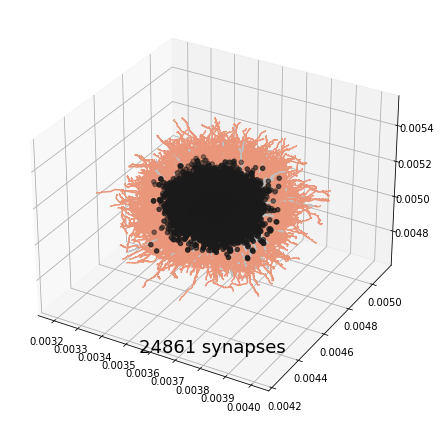

In [5]:
from snudda.plotting.plot_network import PlotNetwork
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it